In [1]:
import pandas as pd
data = pd.read_csv("wildfireData.csv")

/Users/RSM/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Printing the column names

data.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [3]:
# Printing the columns that have NAs and NaNs

x = data.isna().sum()
for i in range(len(x)): 
    if (x[i] > 0):
        print("{}\n{}\n\n".format(x.index[i],x[i]))

LOCAL_FIRE_REPORT_ID
1459286


LOCAL_INCIDENT_ID
820821


FIRE_CODE
1555741


FIRE_NAME
960479


ICS_209_INCIDENT_NUMBER
1854748


ICS_209_NAME
1854748


MTBS_ID
1869462


MTBS_FIRE_NAME
1869462


COMPLEX_NAME
1875282


DISCOVERY_TIME
882638


CONT_DATE
891531


CONT_DOY
891531


CONT_TIME
972553


COUNTY
678148


FIPS_CODE
678148


FIPS_NAME
678148




In [4]:
data = data.drop(['Shape'], axis = 1)
print(data.shape)
data.head()

(1880465, 38)


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,0.10,A,40.036944,-121.005833,5,USFS,CA,63,63.0,Plumas
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,0.25,A,38.933056,-120.404444,5,USFS,CA,61,61.0,Placer
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,0.10,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17,17.0,El Dorado
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,0.10,A,38.559167,-119.913333,5,USFS,CA,3,3.0,Alpine
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,0.10,A,38.559167,-119.933056,5,USFS,CA,3,3.0,Alpine


STATE
CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: OBJECTID, dtype: int64


<IPython.core.display.Javascript object>


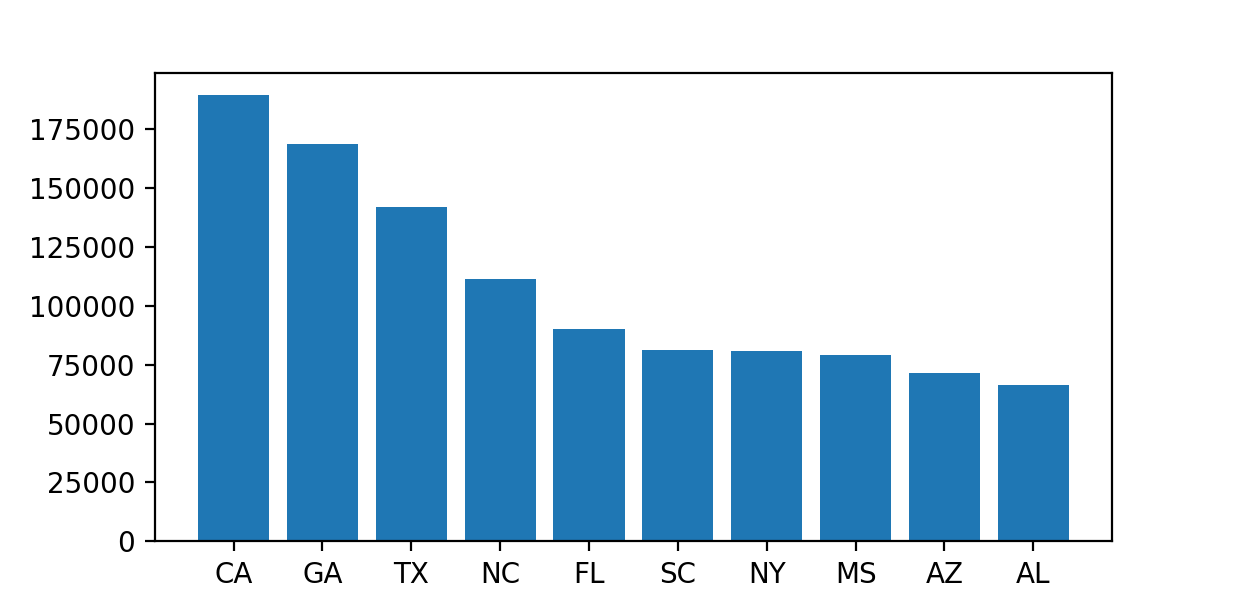

<BarContainer object of 10 artists>

In [10]:
# Number of Fires By State
NoOfFiresByState = (data.groupby("STATE")["OBJECTID"].count()).sort_values(ascending = False)
print(NoOfFiresByState)

import matplotlib.pyplot as plt
%matplotlib notebook
plt.bar(x=NoOfFiresByState.index[:10], height = NoOfFiresByState.values[:10])


In [6]:
# Listing the Different Causes of Fire
FireCauses = (data.groupby(["STAT_CAUSE_DESCR"], as_index = False)["OBJECTID"].count()).sort_values(by = ['OBJECTID'],ascending = False)
print(FireCauses)
print()

# Listing the Wildfire Incidents By State for Each Cause of Fire
NoOfFiresByStateAndCause = (data.groupby(["STAT_CAUSE_DESCR","STATE"], as_index = False)["OBJECTID"].count())#.sort_values(ascending = False)
print(NoOfFiresByStateAndCause)


     STAT_CAUSE_DESCR  OBJECTID
3      Debris Burning    429028
7       Miscellaneous    323805
0               Arson    281455
6           Lightning    278468
8   Missing/Undefined    166723
4       Equipment Use    147612
1            Campfire     76139
2            Children     61167
11            Smoking     52869
10           Railroad     33455
9           Powerline     14448
5           Fireworks     11500
12          Structure      3796

    STAT_CAUSE_DESCR STATE  OBJECTID
0              Arson    AK       458
1              Arson    AL     21826
2              Arson    AR     10377
3              Arson    AZ      5341
4              Arson    CA     19635
5              Arson    CO       844
6              Arson    CT       576
7              Arson    DC        18
8              Arson    DE        21
9              Arson    FL      7169
10             Arson    GA     29757
11             Arson    HI        10
12             Arson    IA       112
13             Arson    ID      1

<IPython.core.display.Javascript object>


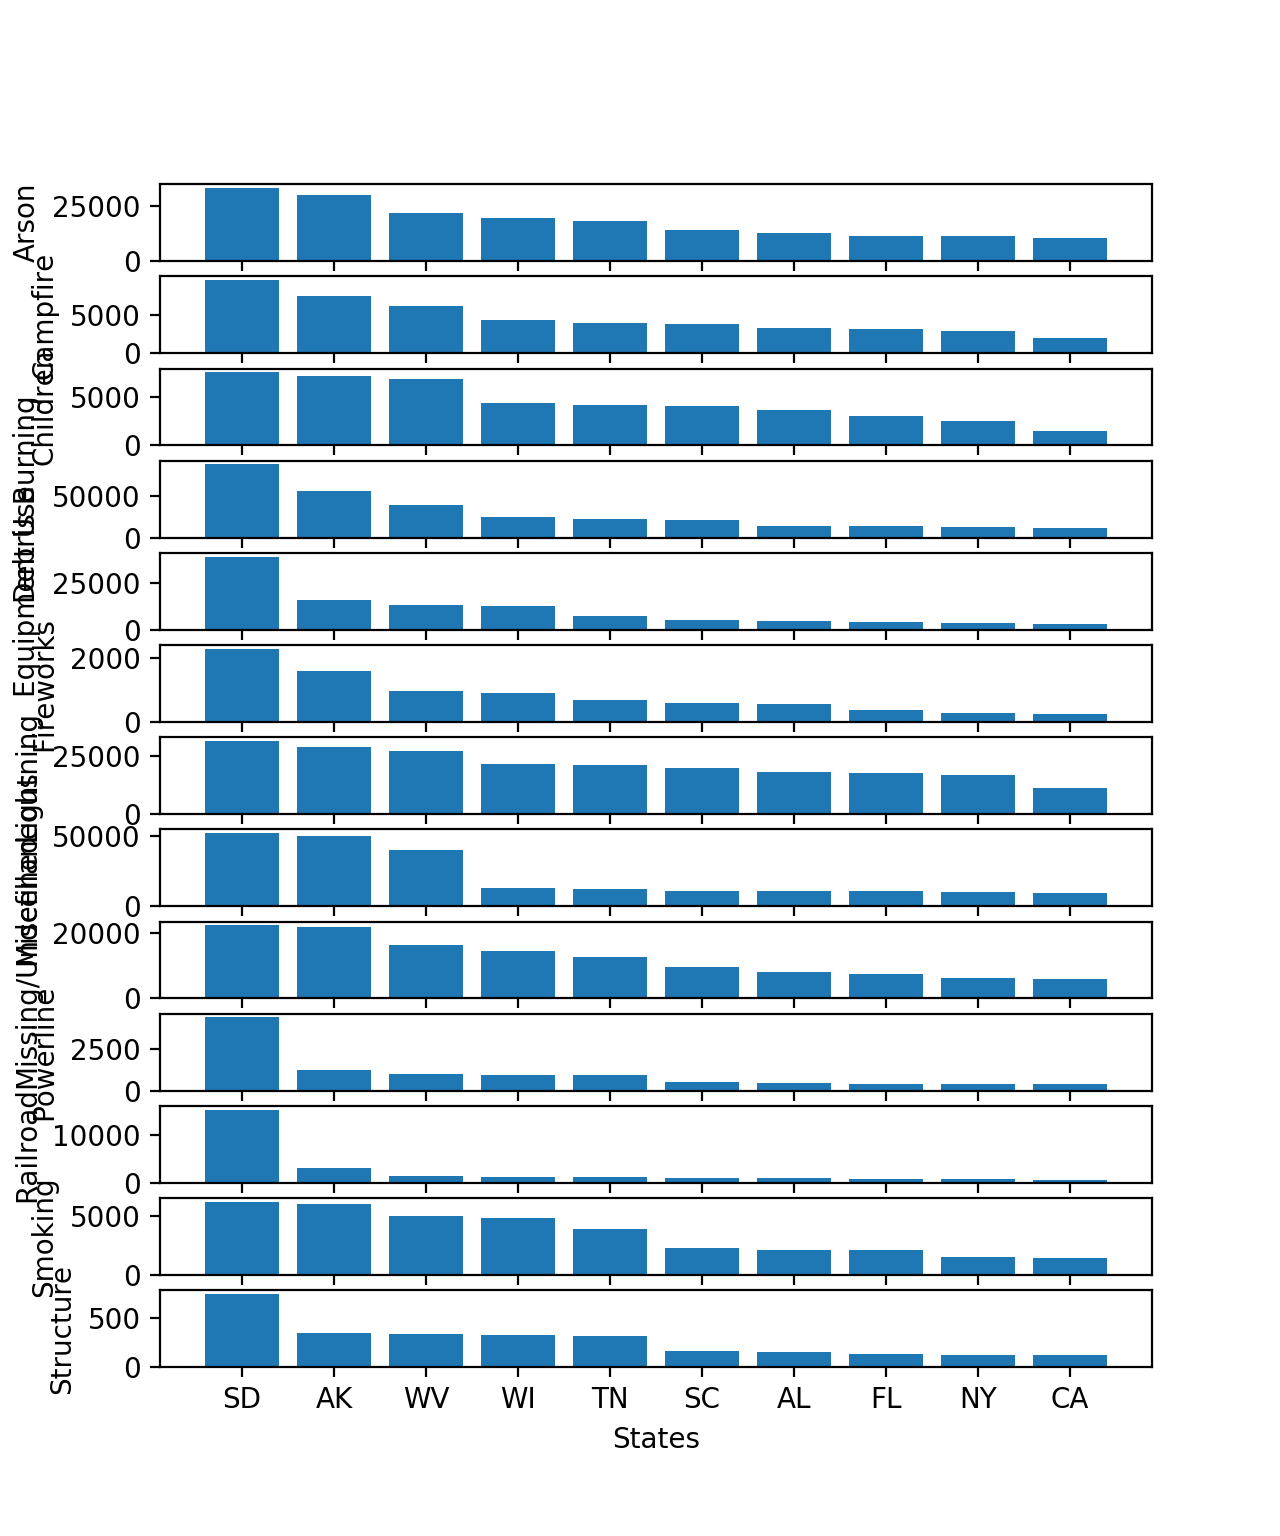

In [11]:
# Ranking States by the cause of fire

from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(13,1,figure = fig)

for i in range(FireCauses.STAT_CAUSE_DESCR.size):
    X_df = (NoOfFiresByStateAndCause[NoOfFiresByStateAndCause["STAT_CAUSE_DESCR"] == FireCauses['STAT_CAUSE_DESCR'][i]]).sort_values(by=['OBJECTID'], ascending = False)
    fig.add_subplot(gs[i,0])
    plt.bar(x = X_df.STATE[:10], height = X_df.OBJECTID[:10])
    plt.xlabel('States')
    plt.ylabel('{}'.format(FireCauses['STAT_CAUSE_DESCR'][i]))
    
    
    

In [8]:
FireCauses['STAT_CAUSE_DESCR']

3        Debris Burning
7         Miscellaneous
0                 Arson
6             Lightning
8     Missing/Undefined
4         Equipment Use
1              Campfire
2              Children
11              Smoking
10             Railroad
9             Powerline
5             Fireworks
12            Structure
Name: STAT_CAUSE_DESCR, dtype: object